In this notebook, I am going through the excercises from the Andrew Ng's Coursera ML course (https://www.coursera.org/learn/machine-learning) using Python standard libraries.

I will try to use standard functions from `scikit-learn` as much as possible.

### usual imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('seaborn-white')
mpl.rcParams['font.size'] = 12
plt.rc('text', usetex=False)
print os.getcwd()

C:\checkouts\ig\coursera-ml


In [3]:
from pandas.plotting import scatter_matrix

### scikit-learn imports

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from sklearn.preprocessing import StandardScaler

# Ex1: Linear Regression

In [6]:
file1 = r'machine-learning-ex1/ex1/ex1data1.txt'
file2 = r'machine-learning-ex1/ex1/ex1data2.txt'

## Part 1: one variable
see http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

### Import and plot the dataset

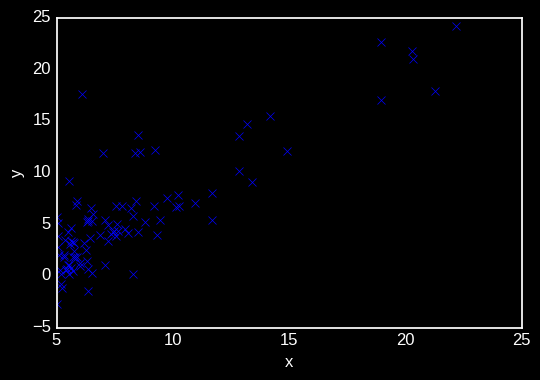

In [5]:
df = pd.read_csv(file1, header=None, names=['x', 'y']);
df = df
#print df.head(3)
plt.plot(df.x, df.y, 'bx')
plt.xlabel('x')
plt.ylabel('y');

### Split data into training and test set (optional)

Samples total:  97
Samples train:  49
Samples test:   48


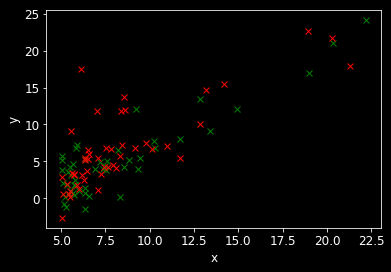

In [147]:
train_fraction = 0.5 # fraction of samples to use for training
np.random.seed(0)
msk = np.random.rand(len(df)) < train_fraction
# this creates two slices (not copies!) of `df`
df_train = df[msk]
df_test = df[~msk]
print 'Samples total: ', len(df)
print 'Samples train: ', len(df_train)
print 'Samples test:  ', len(df_test)
plt.plot(df_train.x, df_train.y, 'gx')
plt.plot(df_test.x, df_test.y, 'rx')
plt.xlabel('x');
plt.ylabel('y');

### Fit using linear regression
This could also be done with `numpy.polyfit`, but we use `sklearn.linear_mode.LenearRegression` functions to introduce the API.

Slope: 1.20, Intercept: -4.59
Train set MSE: 5.33, metrics.R2: 0.81, regr.R2: 0.81
Test set  MSE: 13.57, metrics.R2: 0.56, regr.R2: 0.56


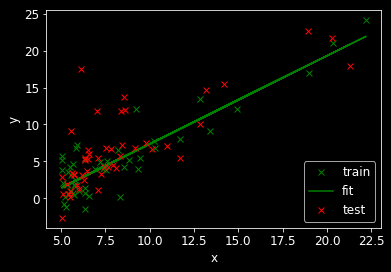

In [150]:
regr = linear_model.LinearRegression()
x = df.x.values.reshape(-1, 1)
train_x = df_train.x.values.reshape(-1, 1)
train_y = df_train.y.values.reshape(-1, 1)
test_x = df_test.x.values.reshape(-1, 1)
test_y = df_test.y.values.reshape(-1, 1)
regr.fit(train_x, train_y)
## The coefficients
print 'Slope: %.2f, Intercept: %.2f' % (regr.coef_, regr.intercept_)

# predict for all samples
df['f'] = regr.predict(x)
# reload slices to get f
df_train = df[msk]
df_test = df[~msk]
train_f = df_train.f.values.reshape(-1, 1)
test_f = df_test.f.values.reshape(-1, 1)
# compute scores on train and test sets

## The mean squared error and R2 score
# R2 score can be computed using `regr.score()` or `sklearn.metrics.r2_score()`
try:
    train_mse = mean_squared_error(train_y, train_f)
    train_r2 = r2_score(train_y, train_f)
    train_r2_alt = regr.score(train_x, train_y)
    print 'Train set MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (train_mse, train_r2, train_r2_alt)
except:
    pass
try:
    test_mse = mean_squared_error(test_y, test_f)
    test_r2 = r2_score(test_y, test_f)
    test_r2_alt = regr.score(test_x, test_y)
    print 'Test set  MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (test_mse, test_r2, test_r2_alt)
except:
    pass
# Plot
plt.plot(df_train.x, df_train.y, 'gx', label='train')
plt.plot(df.x, df.f, 'g-', label='fit')
plt.plot(df_test.x, df_test.y, 'rx', label='test')
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc=4);

## Part 2: multiple variables

### Import and visualize data

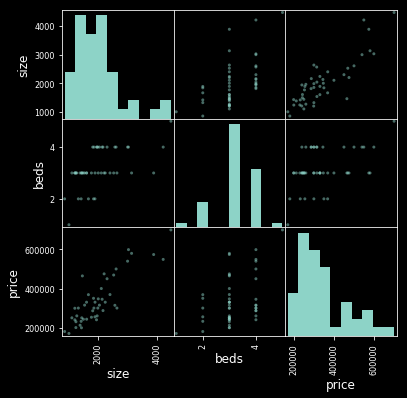

In [65]:
df = pd.read_csv(file2, header=None, names=['size', 'beds', 'price']);
df.describe(percentiles=[])
scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='hist');

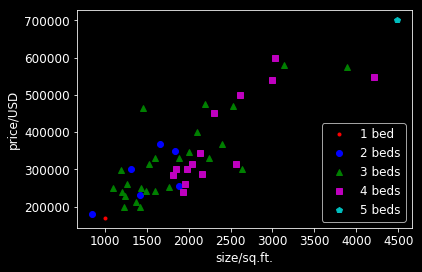

In [83]:
styles = [
    'r.',
    'bo',
    'g^',
    'ms',
    'cp',
    'wh'
    
]
for bed in sorted(df['beds'].unique()):
    df_sub = df[df['beds'] == bed]
    label = '%d bed%s' % (bed, '' if bed==1 else 's')
    style = styles[bed-1]
    plt.plot(df_sub['size'], df_sub['price'], style, label=label)
plt.legend(loc=4);
plt.xlabel('size/sq.ft.')
plt.ylabel('price/USD')

### Feature normalization
Normalize features using `sklearn.preprocessing.StandardScaler`
**NB** `Normalizer` scales each sample individually!!!

In [8]:
scaler = StandardScaler()

In [9]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

,size,beds,price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,-9.448707e-18,2.427137e-16,-6.614095e-17
std,1.010811e+00,1.010811e+00,1.010811e+00
min,-1.461049e+00,-2.882690e+00,-1.378409e+00
50%,-1.433229e-01,-2.260934e-01,-3.275006e-01
max,3.150993e+00,2.430504e+00,2.906063e+00


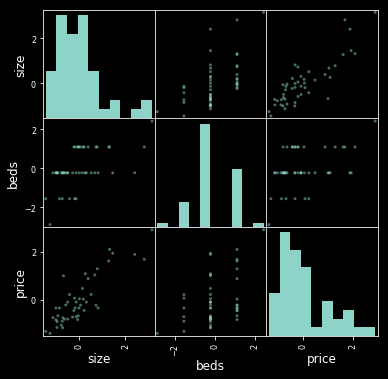

In [10]:
scatter_matrix(df_scaled, alpha=0.5, figsize=(6, 6), diagonal='hist')
#plt.plot(df.x, df.y, 'rx')
#plt.xlabel('x')
#plt.ylabel('y')
df_scaled.describe(percentiles=[])

### perform linear regression on scaled features

In [18]:
scaled_x = df_scaled[['size', 'beds']].values.reshape(-1, 2)
scaled_y = df_scaled['price'].values.reshape(-1, 1)

In [27]:
regr = linear_model.LinearRegression()
regr.fit(scaled_x, scaled_y)
## The coefficients
print 'Slopes: %s, Intercept: %s' % (regr.coef_, regr.intercept_)

Slopes: [[ 0.88476599 -0.05317882]], Intercept: [ -6.00862017e-17]


### Combine scaling and regression

In [42]:
n_features = 2

In [50]:
# x values to be used for prediction
test_x = [[1650, 3]]
# add y column for compatibility with scaler
test_x_y = np.hstack([test_x, np.zeros((np.size(test_x, 0), 1))])
# scale
test_x_y_scaled = scaler.transform(test_x_y)
# apply model on scaled values
test_x_y_scaled[:, n_features] = regr.predict(test_x_y_scaled[:, :n_features])
# inverse transform
test_x_y = scaler.inverse_transform(test_x_y_scaled)

#
test_x_y

array([[  1.65000000e+03,   3.00000000e+00,   2.93081464e+05]])

### ToDo
- [x] visualize fit (3D or 2D per-bed-nr)
- scale (input) features only for consistency
- use sklearn pipeline to perform fitting

# Ex 2: Logistic Regression
See e.g. `http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py`

In [8]:
file1 = r'machine-learning-ex2/ex2/ex2data1.txt'
file2 = r'machine-learning-ex2/ex2/ex2data2.txt'

## Part 1: Logistic regression, linear decision boundary

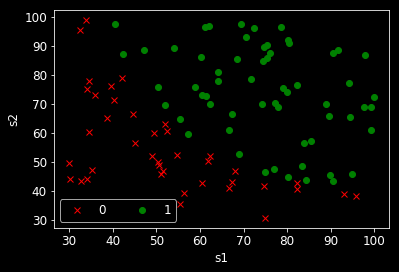

In [146]:
df = pd.read_csv(file1, header=None, names=['s1', 's2', 'adm'])
df.describe(percentiles=[])
for adm, style in zip([0, 1], ['rx', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')

### Train on full dataset

In [147]:
X = df[['s1', 's2']].values
y = df['adm'].values

## Large C means no regularization!
regr = linear_model.LogisticRegression(C=1e10)
regr.fit(X, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[[ 0.20459008  0.19981009]] [-24.9560464]


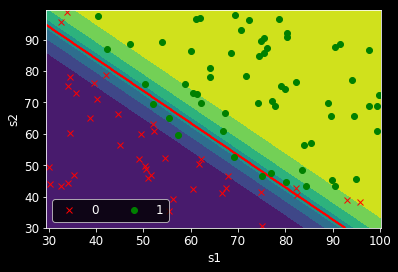

In [148]:
h = .1;

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
Z = regr.predict(X)
P = regr.predict_proba(X)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
P0 = P[:,0].reshape(xx.shape)
P1 = P[:,1].reshape(xx.shape)
plt.contour(xx, yy, Z, colors='r')
plt.contourf(xx, yy, P1)
for adm, style in zip([0, 1], ['rx', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')
print regr.coef_, regr.intercept_

## Part 2: Polynomial features and Pipelines

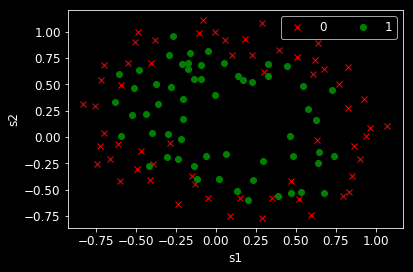

In [9]:
df = pd.read_csv(file2, header=None, names=['s1', 's2', 'adm'])
df.describe(percentiles=[])
for adm, style in zip([0, 1], ['rx', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')

### Train on full dataset

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [32]:
X = df[['s1', 's2']].values
y = df['adm'].values
# Example: degree=10, C=1e10 will overfit massively!!!
degree = 6
C = 1e10
model = Pipeline([('poly', PolynomialFeatures(degree=degree)), 
                  ('LR', LogisticRegression(C=C, fit_intercept=False))])

model.fit(X, y)
score = model.score(X, y)
print score

0.889830508475


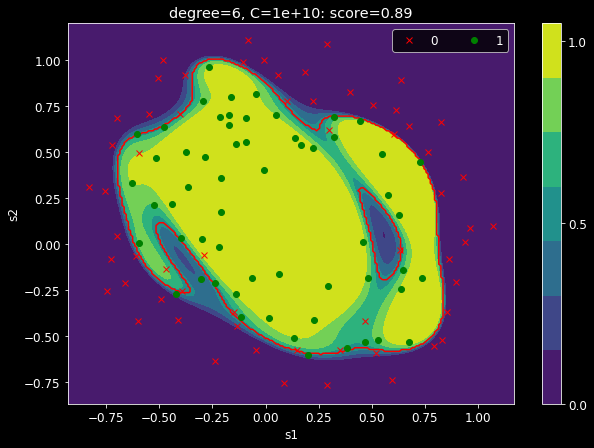

In [33]:
h = .01;
margin = 0.1
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X)
Z = Z.reshape(xx.shape)
P = model.predict_proba(X)
P0 = P[:,0].reshape(xx.shape)
P1 = P[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contour(xx, yy, Z, colors='r', levels=[0.5])
plt.contourf(xx, yy, P1)
for adm, style in zip([0, 1], ['rx', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')
plt.colorbar(ticks=[0, 0.5, 1])
plt.title('degree=%d, C=%.0e: score=%.2f' % (degree, C, score))

In [14]:
# access pipeline sub-steps
model.named_steps['LR'].intercept_

0.0

### ToDo
- LogisticRegressionCV for parameter selection?